Try data analysis following the example at https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

In [265]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import os as os
import seaborn as sns
import matplotlib.pyplot as plt

In [266]:
#fig settings
%matplotlib inline  
sns.set_style("darkgrid")

#set wd
path='C:\\Users\\Grayson\\Documents\\Data Science\\Kaggle\\Housing'
os.chdir(path)

In [267]:
#import data
train=pd.read_csv('train.csv')
validate=pd.read_csv('test.csv')

In [268]:
v_null_feat={el for el in validate.columns[validate.isnull().sum()>=1]}
t_null_feat={el for el in train.columns[train.isnull().sum()>=1]}
all_null_feat=v_null_feat | t_null_feat

print('Number of features with any missing values:\t {}'.format(len(all_null_feat)))
print('Total number of features:\t {}'.format(len(validate.columns)))


#For now drop all features with any missing data
#drop_feat=[feat for feat in all_null_feat]
#train=train.drop(drop_feat,axis=1)
#validate=validate.drop(drop_feat,axis=1)

print('\nDropped columns: \t{}'.format(drop_feat))

Number of features with any missing values:	 34
Total number of features:	 80

Dropped columns: 	['GarageYrBlt', 'GarageType', 'GarageArea', 'Utilities', 'BsmtQual', 'GarageFinish', 'MasVnrType', 'Exterior2nd', 'BsmtHalfBath', 'BsmtFinType2', 'BsmtFullBath', 'MasVnrArea', 'LotFrontage', 'FireplaceQu', 'MSZoning', 'TotalBsmtSF', 'GarageCond', 'Functional', 'SaleType', 'KitchenQual', 'BsmtUnfSF', 'Alley', 'MiscFeature', 'Exterior1st', 'BsmtFinSF2', 'Electrical', 'BsmtFinSF1', 'GarageQual', 'BsmtCond', 'BsmtExposure', 'PoolQC', 'Fence', 'GarageCars', 'BsmtFinType1']


In [269]:
#FW
    #better handling of missing data

In [270]:
print('SalePrice before adjustments:')
print("Mean:{}".format(round(train['SalePrice'].mean())) )
print("Skewness:{}".format(round(train['SalePrice'].skew(),2)) )

print('SalePrice after adjustments:')
print("Mean:{}".format(round(np.log(train['SalePrice']).mean())) )
print("Skewness:{}".format(round(np.log(train['SalePrice']).skew(),2)) )

SalePrice before adjustments:
Mean:180921
Skewness:1.88
SalePrice after adjustments:
Mean:12
Skewness:0.12


C:\Users\Grayson\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


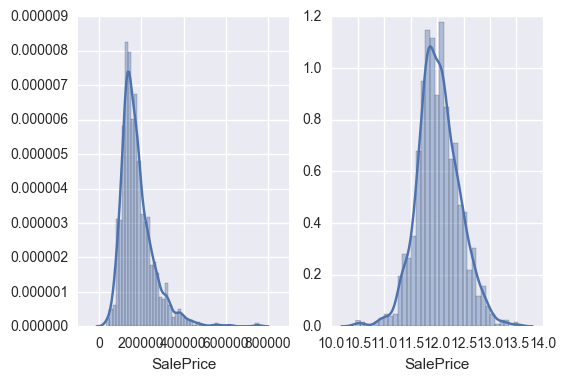

In [271]:
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'])
plt.subplot(1,2,2)
sns.distplot(np.log(train['SalePrice']))
plt.show()

In [272]:
#Transform SalePrice (target)
train['SalePrice']=np.log(train['SalePrice'])
train['SalePrice'].describe()

count    1460.000000
mean       12.024051
std         0.399452
min        10.460242
25%        11.775097
50%        12.001505
75%        12.273731
max        13.534473
Name: SalePrice, dtype: float64

In [273]:
#Summary of features
print({x for x in train.dtypes})
[sum(train.dtypes==y) for y in {x for x in train.dtypes}]
#38 numeric and 43 qualitative features

{dtype('float64'), dtype('O'), dtype('int64')}


[4, 43, 34]

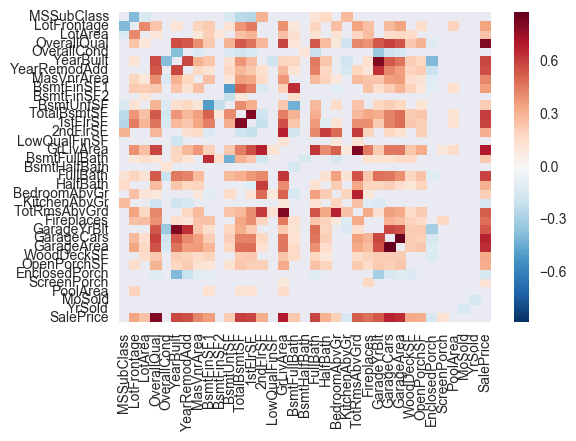

In [274]:
#look for high correlation within features
cor_mat=train.corr()
np.fill_diagonal(cor_mat.values,0)
cor_feat=train.corr()[cor_mat.abs()>0.1].dropna(axis=0,how='all').dropna(axis=1,how='all')
sns.heatmap(cor_feat)

#drop GarageCars since GarageArea is measuring the same thing
#train=train.drop(['GarageCars'],axis=1)

In [275]:
#FW

    #three cases, ~same footprint, smaller bsmt, no basement
#sns.regplot(train['TotalBsmtSF'],train['1stFlrSF'])
#plt.show()

    # Garage either built same time as house or later.  For now drop garage built but come back later
#sns.regplot(train['YearBuilt'],train['GarageYrBlt'])
#plt.show()

    #drop more columns with high correlation with existing features
#train=train.drop(['TotRmsAbvGrd','TotalBsmtSF','GarageYrBlt'],axis=1)

In [276]:
#List correlation of each variable with SalePrice
corr=train.corr()
cor_dict=corr['SalePrice'].to_dict()
cor_list=sorted(cor_dict.items(), key = lambda x: -abs(x[1]))

for el in cor_list:
    print('{0}: \t{1}'.format(el[0],el[1]))
    
#FW

#drop features with correlation below 0.2 with target
#weak_feat=[x[0] for x in cor_list if abs(x[1])<0.2]
#train=train.drop(weak_feat,axis=1)

SalePrice: 	1.0
OverallQual: 	0.8171844179216822
GrLivArea: 	0.7009266525441293
GarageCars: 	0.6806248074360439
GarageArea: 	0.6508875559020062
TotalBsmtSF: 	0.6121339753697865
1stFlrSF: 	0.596981045034374
FullBath: 	0.5947705420075314
YearBuilt: 	0.5865702403842262
YearRemodAdd: 	0.5656078325911801
GarageYrBlt: 	0.541072862595876
TotRmsAbvGrd: 	0.5344222037231195
Fireplaces: 	0.48944942759848153
MasVnrArea: 	0.43080852419510485
BsmtFinSF1: 	0.3720230735670904
LotFrontage: 	0.3558784703859834
WoodDeckSF: 	0.3341350739575136
OpenPorchSF: 	0.3210529720197666
2ndFlrSF: 	0.3192999843472038
HalfBath: 	0.3139822499151441
LotArea: 	0.25731989235273833
BsmtFullBath: 	0.2362241088243532
BsmtUnfSF: 	0.22198505352520953
BedroomAbvGr: 	0.20904368212692215
EnclosedPorch: 	-0.1490502814276759
KitchenAbvGr: 	-0.14754808847658205
ScreenPorch: 	0.12120760489686298
MSSubClass: 	-0.07395901733239706
PoolArea: 	0.06979780600969131
MoSold: 	0.05732948459791035
3SsnPorch: 	0.05490022646761992
LowQualFinSF: 

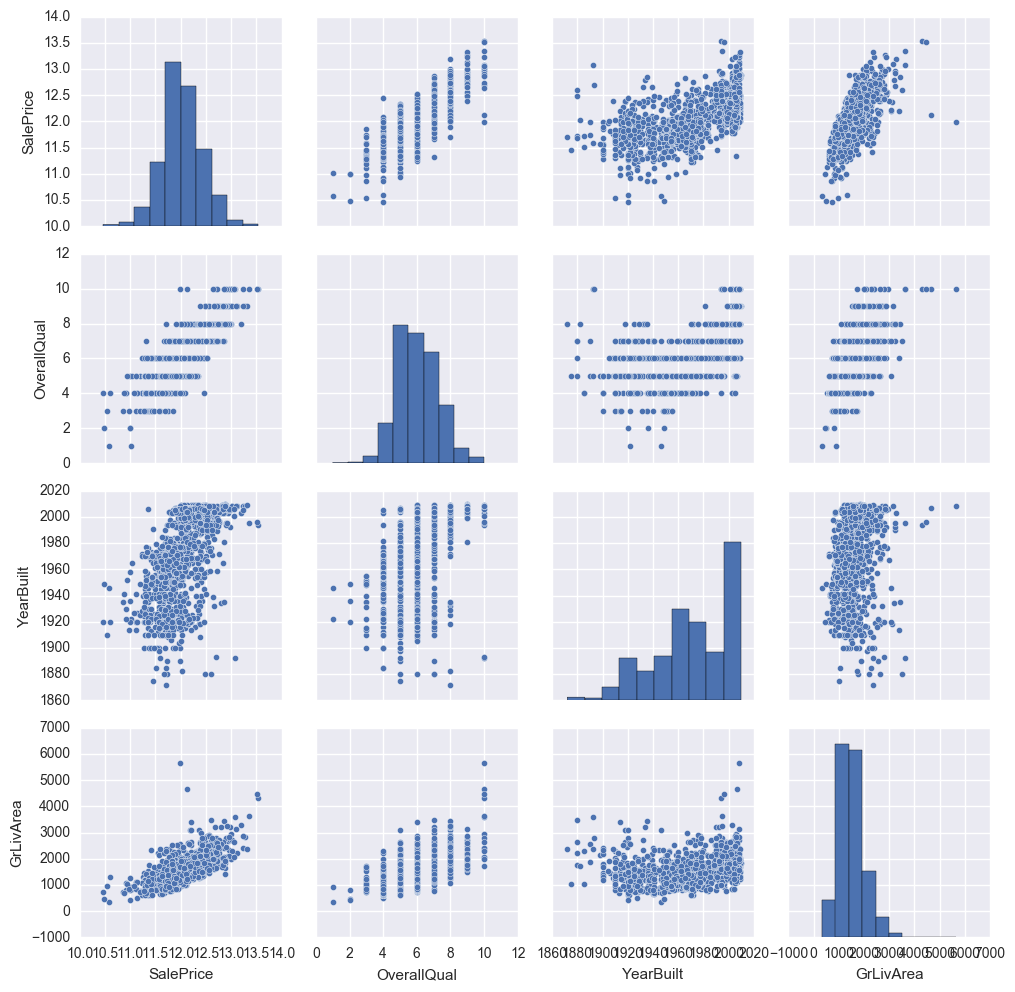

In [277]:
sns.pairplot(train.loc[:,['SalePrice','OverallQual','YearBuilt','GrLivArea']])
plt.show()

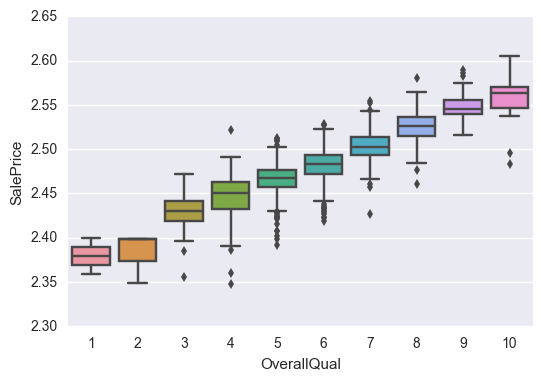

In [278]:
sns.boxplot(train['OverallQual'],np.log(train['SalePrice']))
plt.show()

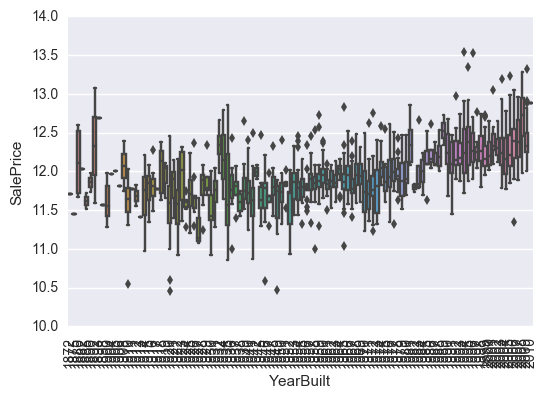

In [279]:
sns.boxplot(train['YearBuilt'],train['SalePrice'])
plt.xticks(rotation=90);
plt.show()

Data Pre-processing

In [280]:
from sklearn import cross_validation
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, Lasso, LassoCV, LassoLarsCV, LinearRegression

In [281]:
train=pd.get_dummies(train)
validate=pd.get_dummies(validate)

In [293]:
train=train.fillna(train.mean())
validate=validate.fillna(validate.mean())

In [294]:
v_only={el for el in validate.columns}-{el for el in train.columns}
t_only={el for el in train.columns}-{el for el in validate.columns}

print('Columns only in validation set:{}'.format(v_only) )
print('Columns only in training set:{}'.format(t_only) )

for el in t_only:
    validate[el] = pd.Series(train[el].mean()*np.ones(len(validate)))

#some features have different values in the training and validation set

Columns only in validation set:set()
Columns only in training set:set()


In [295]:
Y=train['SalePrice']
X=train.drop(['SalePrice'],axis=1)
X_val=validate.drop(['SalePrice'],axis=1)

In [296]:
def RMSE(Y,P):
    SE=[(Y[i]-P[i])**2 for i in range(len(P))]
    SSE=sum(SE)
    MSE=SSE/len(P)
    RMSE=np.sqrt(MSE)
    return RMSE    

In [297]:
#split test/train for model comparison
X_train, X_test, Y_train, Y_test =train_test_split(X, Y, test_size=0.33)

In [298]:
al=np.logspace(-5,-3,10)
lr=LassoCV(alphas=al,normalize=True)
lr.fit(X_train,Y_train)
lr_pred=lr.predict(X_test)
lr_pred_train=lr.predict(X_train)
lr_pred_val=lr.predict(X_val)

Selected alpha: 0.00035938136638046257


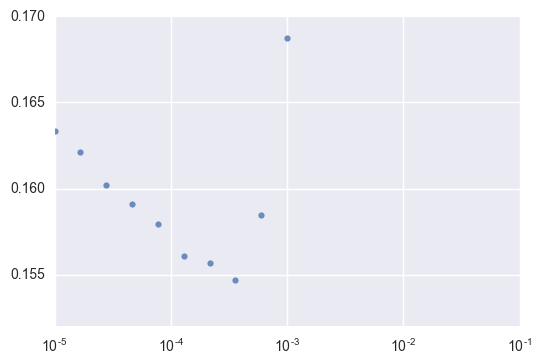

In [299]:
sns.regplot(lr.alphas_,np.sqrt(lr.mse_path_.mean(axis=1)),fit_reg=False)
ax=plt.gca()
ax.set_xscale('log')
plt.xlim(1E-5,1E-1);
print('Selected alpha: {}'.format(lr.alpha_))

RMSE (train):	 0.11369862619345998
RMSE (test):	 0.13716342228727782


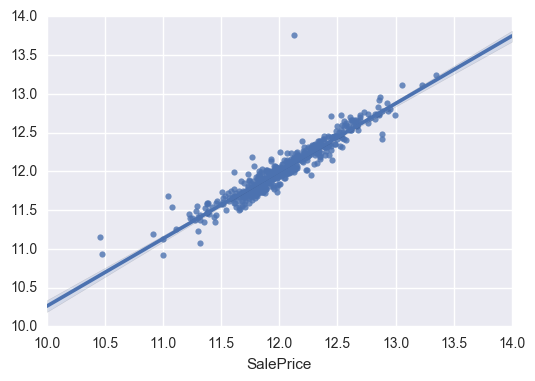

In [300]:
sns.regplot(Y_test,lr_pred)
print('RMSE (train):\t {}'.format(RMSE(np.array(Y_train),lr_pred_train)))
print('RMSE (test):\t {}'.format(RMSE(np.array(Y_test),lr_pred)))

(array([ 0.00283264,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.00566527,  0.01699582,  0.06515064,  0.32858584,
         0.94893324,  1.05374079,  0.99142279,  0.50137667,  0.18128874,
         0.03399164,  0.        ,  0.        ,  0.        ,  0.00283264]),
 array([  9.07916824,   9.32113397,   9.56309969,   9.80506542,
         10.04703115,  10.28899687,  10.5309626 ,  10.77292833,
         11.01489406,  11.25685978,  11.49882551,  11.74079124,
         11.98275696,  12.22472269,  12.46668842,  12.70865414,
         12.95061987,  13.1925856 ,  13.43455132,  13.67651705,  13.91848278]),
 <a list of 20 Patch objects>)

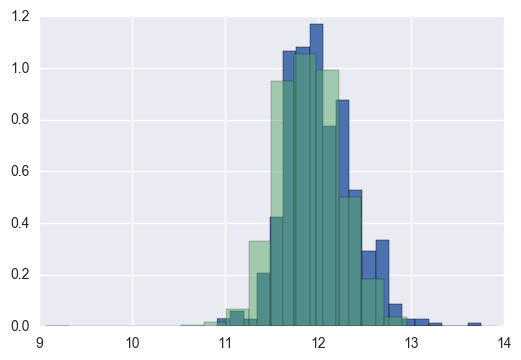

In [301]:
plt.hist(lr_pred,bins=20,normed=1)
#plt.hist(lr_pred_train,alpha=0.5,bins=20,normed=1)
plt.hist(lr_pred_val,alpha=0.5,bins=20,normed=1)

In [302]:
output = pd.DataFrame()
output['Id']=validate['Id']
output['SalePrice']=np.exp(lr_pred_val)
#output

In [303]:
np.savetxt("lr_lasso.csv",output,'%1i', delimiter=",",header='Id,SalePrice',)